# **Import necessary libraries**

In [1]:
# keras imports for the dataset and building our neural network
import keras 
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten,Input
from keras.utils import np_utils
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD

# **Load and preprocess the CIFAR10 dataset**

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)


In [4]:
#make a input vector so we 
#reshape it into input format for training and testing sets. After that change all datatypes into floats

# building the input vector from the 32x32 pixels
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [5]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

In [6]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


In [7]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 10)


# **custom network architecture 1**

In [8]:
# Define input shape
input_shape = (32, 32, 3)

# Define the input layer
inputs = Input(shape=input_shape)

# Define the first convolutional layer with a learning rate of 0.01
conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv1')(inputs)

# Define the second convolutional layer with a learning rate of 0.005
conv2 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv2')(conv1)

# Define the third convolutional layer with a learning rate of 0.001
conv3 = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv3')(conv2)

# Define the fourth convolutional layer with a learning rate of 0.0005
conv4 = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', name='conv4')(conv3)

# Define the fifth convolutional layer with a learning rate of 0.0001
conv5 = Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu', name='conv5')(conv4)

# Define the max pooling layer
pooling = MaxPooling2D(pool_size=(2, 2), name='max_pooling')(conv5)

# Flatten the output from the max pooling layer
flatten = Flatten(name='flatten')(pooling)

# Define the first fully connected layer
fc1 = Dense(units=256, activation='relu', name='fc1')(flatten)

# Add a dropout layer to prevent overfitting
dropout1 = Dropout(rate=0.4, name='dropout1')(fc1)

# Define the second fully connected layer
fc2 = Dense(units=128, activation='relu', name='fc2')(dropout1)

# Add a dropout layer to prevent overfitting
dropout2 = Dropout(rate=0.3, name='dropout2')(fc2)

# Define the output layer
outputs = Dense(units=10, activation='softmax', name='output')(dropout2)

# Create the model
model = Model(inputs=inputs, outputs=outputs, name='my_custom_model')

# Define the optimizer with different learning rates for different convolutional layers
sgd = SGD(lr={'conv1': 0.01, 'conv2': 0.005, 'conv3': 0.001, 'conv4': 0.0005, 'conv5': 0.0001})

# Compile the model with categorical cross-entropy loss and accuracy metric
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
history=model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
391/391 [==============================] - 79s 161ms/step - loss: 2.1824 - accuracy: 0.1908 - val_loss: 2.0078 - val_accuracy: 0.2843
Epoch 2/30
391/391 [==============================] - 59s 151ms/step - loss: 1.9624 - accuracy: 0.2934 - val_loss: 1.8682 - val_accuracy: 0.3362
Epoch 3/30
391/391 [==============================] - 59s 151ms/step - loss: 1.8409 - accuracy: 0.3411 - val_loss: 1.6814 - val_accuracy: 0.4095
Epoch 4/30
391/391 [==============================] - 61s 155ms/step - loss: 1.7605 - accuracy: 0.3735 - val_loss: 1.6613 - val_accuracy: 0.4111
Epoch 5/30
391/391 [==============================] - 61s 155ms/step - loss: 1.6845 - accuracy: 0.3980 - val_loss: 1.5767 - val_accuracy: 0.4362
Epoch 6/30
391/391 [==============================] - 59s 152ms/step - loss: 1.6104 - accuracy: 0.4211 - val_loss: 1.4588 - val_accuracy: 0.4801
Epoch 7/30
391/391 [==============================] - 59s 152ms/step - loss: 1.5503 - accuracy: 0.4460 - val_loss: 1.3937 - val_ac

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.99477618932724
Test accuracy: 0.7020000219345093


In [10]:
# record the training and validation accuracy and loss after each epoch
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# save the training log in a file
with open('archi_1_logfile.txt', 'w') as f:
    for i in range(len(train_acc)):
        f.write("Epoch {}: train_acc = {}, train_loss = {}, val_acc = {}, val_loss = {}\n".format(
            i+1, train_acc[i], train_loss[i], val_acc[i], val_loss[i]))

In [13]:
# save the test accuracy and loss in the training log file
with open('archi_1_logfile.txt', 'a') as f:
    f.write("Test accuracy = {}, Test loss = {}\n".format(test_acc, test_loss))

In [14]:
model.summary()

Model: "my_custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 64)        18496     
                                                                 
 conv3 (Conv2D)              (None, 32, 32, 128)       73856     
                                                                 
 conv4 (Conv2D)              (None, 32, 32, 256)       295168    
                                                                 
 conv5 (Conv2D)              (None, 32, 32, 512)       1180160   
                                                                 
 max_pooling (MaxPooling2D)  (None, 16, 16, 512)   

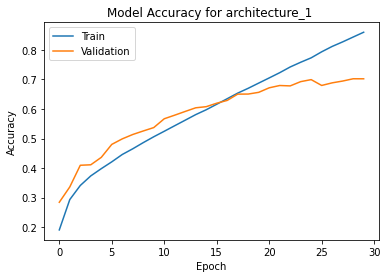

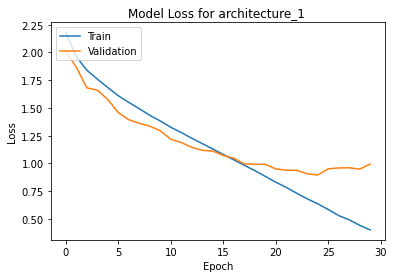

In [17]:
# plot the training and validation accuracy curves
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy for architecture_1 ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Archi_1_accuracy.png')
plt.show()

# plot the training and validation loss curves
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model Loss for architecture_1 ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Archi_1_accuracy_loss.png')
plt.show()


# **custom network architecture 2**

In [18]:
# Define input shape
input_shape = (32, 32, 3)

# Define the input layer
inputs = Input(shape=input_shape)

# Define the first convolutional layer with a learning rate of 0.01
conv1 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv1')(inputs)

# Define the second convolutional layer with a learning rate of 0.05
conv2 = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', name='conv2')(conv1)

# Define the third convolutional layer with a learning rate of 0.001
conv3 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv3')(conv2)

# Define the fourth convolutional layer with a learning rate of 0.005
conv4 = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', name='conv4')(conv3)

# Define the fifth convolutional layer with a learning rate of 0.0009
conv5 = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', name='conv5')(conv4)

# Define the six convolutional layer with a learning rate of 0.005
conv6 = Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', name='conv6')(conv5)

# Define the max pooling layer
pooling = MaxPooling2D(pool_size=(2, 2), name='max_pooling')(conv6)

# Flatten the output from the max pooling layer
flatten = Flatten(name='flatten')(pooling)

# Define the first fully connected layer
fc1 = Dense(units=256, activation='relu', name='fc1')(flatten)

# Add a dropout layer to prevent overfitting
dropout1 = Dropout(rate=0.4, name='dropout1')(fc1)

# Define the second fully connected layer
fc2 = Dense(units=128, activation='relu', name='fc2')(dropout1)

# Add a dropout layer to prevent overfitting
dropout2 = Dropout(rate=0.3, name='dropout2')(fc2)

# Define the output layer
outputs = Dense(units=10, activation='softmax', name='output')(dropout2)

# Create the model
model = Model(inputs=inputs, outputs=outputs, name='my_custom_model')

# Define the optimizer with different learning rates for different convolutional layers
sgd = SGD(lr={'conv1': 0.01, 'conv2': 0.05, 'conv3': 0.001, 'conv4': 0.005, 'conv5': 0.0009,'conv6': 0.005})

# Compile the model with categorical cross-entropy loss and accuracy metric
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)
history=model.fit(X_train, y_train, batch_size=150, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
334/334 [==============================] - 32s 87ms/step - loss: 2.2572 - accuracy: 0.1511 - val_loss: 2.1189 - val_accuracy: 0.2257
Epoch 2/20
334/334 [==============================] - 28s 84ms/step - loss: 2.0517 - accuracy: 0.2537 - val_loss: 1.8561 - val_accuracy: 0.3418
Epoch 3/20
334/334 [==============================] - 28s 83ms/step - loss: 1.9070 - accuracy: 0.3159 - val_loss: 1.7598 - val_accuracy: 0.3685
Epoch 4/20
334/334 [==============================] - 27s 80ms/step - loss: 1.8177 - accuracy: 0.3524 - val_loss: 1.6654 - val_accuracy: 0.4109
Epoch 5/20
334/334 [==============================] - 27s 80ms/step - loss: 1.7460 - accuracy: 0.3786 - val_loss: 1.6248 - val_accuracy: 0.4232
Epoch 6/20
334/334 [==============================] - 27s 80ms/step - loss: 1.6829 - accuracy: 0.3979 - val_loss: 1.5239 - val_accuracy: 0.4473
Epoch 7/20
334/334 [==============================] - 27s 80ms/step - loss: 1.6237 - accuracy: 0.4181 - val_loss: 1.4997 - val_accuracy:

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 1.1210068464279175
Test accuracy: 0.6121000051498413


In [20]:
# record the training and validation accuracy and loss after each epoch
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
# save the training log in a file
with open('archi_2_logfiles.txt', 'w') as f:
    for i in range(len(train_acc)):
        f.write("Epoch {}: train_acc = {}, train_loss = {}, val_acc = {}, val_loss = {}\n".format(
            i+1, train_acc[i], train_loss[i], val_acc[i], val_loss[i]))

# save the test accuracy and loss in the training log file
with open('archi_2_logfiles.txt', 'a') as f:
    f.write("Test accuracy = {}, Test loss = {}\n".format(test_acc, test_loss))

In [21]:
model.summary()

Model: "my_custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 32, 32, 32)        896       
                                                                 
 conv2 (Conv2D)              (None, 32, 32, 32)        9248      
                                                                 
 conv3 (Conv2D)              (None, 32, 32, 64)        18496     
                                                                 
 conv4 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 conv5 (Conv2D)              (None, 32, 32, 128)       73856     
                                                                 
 conv6 (Conv2D)              (None, 32, 32, 256)   

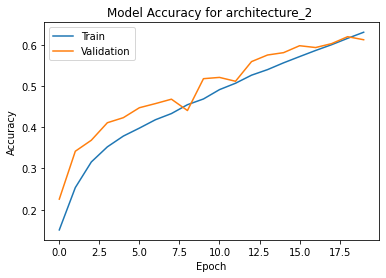

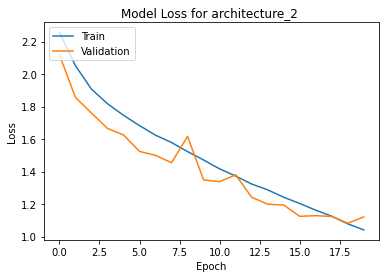

In [22]:
# plot the training and validation accuracy curves
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Model Accuracy for architecture_2 ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Archi_2_accuracy.png')
plt.show()

# plot the training and validation loss curves
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model Loss for architecture_2 ')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('Archi_2_loss.png')
plt.show()